In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awsaf49/brats20-dataset-training-validation")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brats20-dataset-training-validation


In [2]:
pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 48.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117

In [ ]:
import radiomics
from radiomics import featureextractor

image_path="/content/BraTS20_Training_001_flair.nii"
mask_path="/content/BraTS20_Training_001_seg.nii"
# Initialiser l'extracteur de caractéristiques
extractor = featureextractor.RadiomicsFeatureExtractor()

# Configurer l'extracteur (facultatif : vous pouvez personnaliser les paramètres)
extractor.enableAllFeatures()  # Activer toutes les features (GLCM, GLRLM, etc.)
extractor.enableImageTypes(Original={}, LoG={}, Wavelet={})  # Types d'images

# Extraire les features
print("Extraction des features...")
features = extractor.execute(image_path, mask_path)

# Afficher les features extraites
for feature_name, feature_value in features.items():
    print(f"{feature_name}: {feature_value}")

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Extraction des features...


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "LoG" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "Wavelet" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.imageoperations:Computing Wavelet LLH
INFO:radiomics.featureextractor:Calculating features for wavelet-LLH image
INFO:radiomics.featureextractor:Computing firsto

diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 2.0.2
diagnostics_Versions_SimpleITK: 2.5.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.11.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}, 'LoG': {}, 'Wavelet': {}}
diagnostics_Image-original_Hash: 4daf9033b834149980edf93394857021e411d107
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (1.0, 1.0, 1.0)
diagnostics_Image-original_Size: (240, 240, 155)
diagnostics_Image-original_Mean: 26.021915994623654
diagnostics_Image-original_Minimum: 0.0
diagnostics_Image-original_Maximum: 625.0

In [ ]:
gclmname=[]
glcmvalue=[]
glrmname=[]
glrmvalue=[]
histname=[]
histvalue=[]
for feature_name, feature_value in features.items():
    if "glcm" in feature_name.lower():
        gclmname.append(feature_name)
        glcmvalue.append(feature_value)
    if "glrlm" in feature_name.lower():
        glrmname.append(feature_name)
        glrmvalue.append(feature_value)
    if "histogram" in feature_name.lower():
        histname.append(feature_name)


In [ ]:
import pandas as pd
df0=pd.DataFrame(list(zip(gclmname,glcmvalue)),columns=['feature_name','feature_value'])
df1=pd.DataFrame(list(zip(glrmname,glrmvalue)),columns=['feature_name','feature_value'])
df2=pd.DataFrame(list(zip(histname,histvalue)),columns=['feature_name','feature_value'])

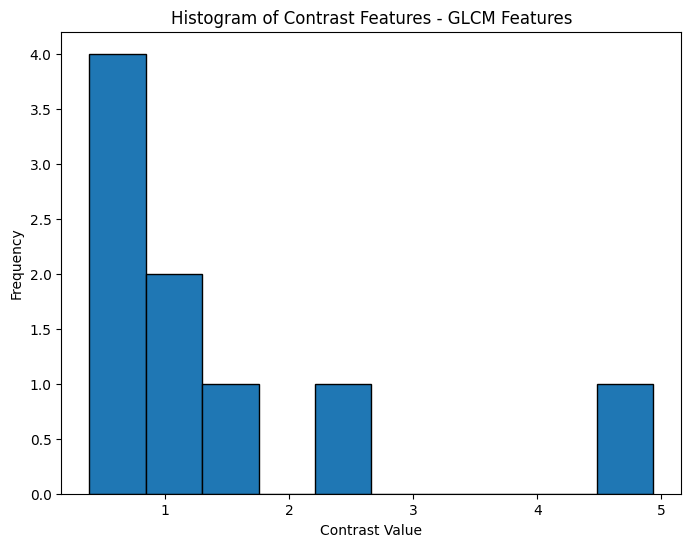

Contrast Features in GLCM Features: ['original_glcm_Contrast', 'wavelet-LLH_glcm_Contrast', 'wavelet-LHL_glcm_Contrast', 'wavelet-LHH_glcm_Contrast', 'wavelet-HLL_glcm_Contrast', 'wavelet-HLH_glcm_Contrast', 'wavelet-HHL_glcm_Contrast', 'wavelet-HHH_glcm_Contrast', 'wavelet-LLL_glcm_Contrast']
Contrast Values in GLCM Features: [array(1.2601896), array(0.38946589), array(1.50577217), array(0.48764723), array(2.64537511), array(0.4885005), array(0.89208995), array(0.50768641), array(4.93438629)]
No contrast features found in GLRLM Features
No contrast features found in Histogram Features


In [ ]:
# prompt: analyse contrast of each df

import matplotlib.pyplot as plt

# Assuming df0, df1, and df2 are already defined as in the previous code

def analyze_contrast(df, title):
    """Analyzes the contrast of features in a DataFrame and plots a histogram."""
    contrast_features = [col for col in df['feature_name'] if 'Contrast' in col]
    contrast_values = [df['feature_value'][i] for i in range(len(df['feature_name'])) if 'Contrast' in df['feature_name'][i]]

    if not contrast_features:
      print(f"No contrast features found in {title}")
      return

    plt.figure(figsize=(8, 6))
    plt.hist(contrast_values, bins=10, edgecolor='black')
    plt.title(f'Histogram of Contrast Features - {title}')
    plt.xlabel('Contrast Value')
    plt.ylabel('Frequency')
    plt.show()

    print(f"Contrast Features in {title}: {contrast_features}")
    print(f"Contrast Values in {title}: {contrast_values}")


analyze_contrast(df0, "GLCM Features")
analyze_contrast(df1, "GLRLM Features")
analyze_contrast(df2, "Histogram Features")


In [ ]:
df0.to_csv('/content/df0.csv', index=False)
df1.to_csv('/content/df1.csv', index=False)
df2.to_csv('/content/df2.csv', index=False)

In [ ]:
!python --version

Python 3.11.12


In [ ]:
!pip install pyradiomics
!pip install SimpleITK
!pip install kagglehub

0
0


In [3]:
import os
import shutil

# Define paths
dataset_path = "/kaggle/input/brats20-dataset-training-validation"  # Path to your dataset
mask_folder = os.path.join("/kaggle/working", "masks")  # Create "masks" folder
image_folder = os.path.join("/kaggle/working", "images")  # Create "images" folder

# Create folders if they don't exist
os.makedirs(mask_folder, exist_ok=True)
os.makedirs(image_folder, exist_ok=True)

# Loop through files and copy segmentation masks
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith("seg.nii"):  # Detect files ending with "seg.nii"
            source_path = os.path.join(root, file)
            destination_path = os.path.join(mask_folder, file)
            shutil.copy(source_path, destination_path) # Change shutil.move to shutil.copy
            print(f"Copied: {source_path} to {destination_path}")
        else:
           if file.endswith(".nii"):
            source_path = os.path.join(root, file)
            destination_path = os.path.join(image_folder, file)
            shutil.copy(source_path, destination_path) # Change shutil.move to shutil.copy
            print(f"Copied: {source_path} to {destination_path}")

Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_flair.nii to /kaggle/working/images/BraTS20_Validation_084_flair.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_t2.nii to /kaggle/working/images/BraTS20_Validation_084_t2.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_t1ce.nii to /kaggle/working/images/BraTS20_Validation_084_t1ce.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_t1.nii to /kaggle/working/images/BraTS20_Validation_084_t1.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraT

In [4]:
import os
import shutil
from radiomics import featureextractor
import SimpleITK as sitk

image_folder = "/kaggle/working/images"
mask_folder = "/kaggle/working/masks"
feature_names = []  # List to store feature names
feature_values_list = []  # List to store feature values for each image

for image_file in os.listdir(image_folder):
    # Extract the base filename without extension
    base_filename = os.path.splitext(image_file)[0]

    # Construct mask filename using the base filename
    mask_filename = base_filename.replace("_flair", "_seg") + ".nii"

    image_path = os.path.join(image_folder, image_file)
    mask_path = os.path.join(mask_folder, mask_filename)

    # Check if the mask file actually exists
    if os.path.exists(mask_path):
        # Load the mask using SimpleITK to check for labels
        mask_image = sitk.ReadImage(mask_path)
        mask_array = sitk.GetArrayFromImage(mask_image)

        # Get unique labels present in the mask (excluding 0 for background)
        labels_present = set(mask_array.flatten().tolist()) - {0}

        # Choose label based on the label present in the mask
        if 2 in labels_present:
            label_to_use = 2
        elif 1 in labels_present:
            label_to_use = 1
        else:
            print(f"Warning: No valid labels (1 or 2) found in {mask_filename}. Skipping.")
            continue

        extractor = featureextractor.RadiomicsFeatureExtractor()
        extractor.enableAllFeatures()
        extractor.enableImageTypes(Original={}, LoG={}, Wavelet={})

        # Specify the label to use dynamically
        extractor.settings['label'] = label_to_use

        print(f"Extraction des features for {image_file} using label {label_to_use}...")
        features = extractor.execute(image_path, mask_path)

        # Store feature names (only once)
        if not feature_names:
            feature_names = list(features.keys())

        # Store feature values for this image
        feature_values = list(features.values())
        feature_values_list.append(feature_values)

    else:
        print(f"Warning: Mask file not found for {image_file}. Skipping.")

# Now you have feature_names and feature_values_list, which you can use to create a DataFrame
import pandas as pd
df = pd.DataFrame(feature_values_list, columns=feature_names)
print(df)
df.to_csv('features.csv', index=False)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
print(feature_values_list)

[['v3.0.1', '2.0.2', '2.5.0', '1.8.0', '3.11.12', {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 2, 'additionalInfo': True}, {'Original': {}, 'LoG': {}, 'Wavelet': {}}, '22d6b6b708291431d11a2f9aec754ae95929e436', '3D', (1.0, 1.0, 1.0), (240, 240, 155), np.float64(89.01512824820789), np.float64(0.0), np.float64(1467.0), 'eee50242f326628d75ea8f00be296856ad3c62ab', (1.0, 1.0, 1.0), (240, 240, 155), (73, 42, 66, 75, 103, 69), 53794, 57, (np.float64(106.29112912220694), np.float64(96.03742053017065), np.float64(96.80324943302227)), (106.29112912220694, -142.96257946982934, 96.80324943302227), np.float64(0.5577742078819006), np.float64(0.49830983054050576), np.float64(53.81508339622676), np.float64(107.99522726223306), array(75.00666637